### Random Forest Regressor
- The `RandomForestRegressor` is a machine learning model from the ensemble learning family, specifically a type of Random Forest algorithm used for regression tasks.

- It is an ensemble of multiple decision trees, where each tree is trained on a random subset of the training data and features (bagging technique).

- Each decision tree predicts a continuous numeric value.

- The final prediction of the RandomForestRegressor is obtained by averaging the predictions of all individual trees, which helps reduce overfitting and improve generalization.

- It handles non-linear relationships and interactions well, making it powerful for complex regression problems.

- It includes hyperparameters like the number of trees (n_estimators), maximum depth of trees, minimum samples per leaf, and others to control model complexity.

This model is widely used for predicting continuous outcomes in diverse domains due to its robustness, accuracy, and ability to model complex patterns without heavy feature engineering.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load your preprocessed earthquake dataset (update path if needed)
data = pd.read_csv('preprocessed_earthquake_data.csv')

# Define feature columns (excluding target 'Magnitude' and any non-informative columns)
X = data.drop(columns=['Magnitude', 'Type', 'Magnitude Type', 'Source', 'Status'])
y = data['Magnitude']

In [6]:
# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize Random Forest regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [8]:
# Train model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Predict on validation set
y_pred = rf_model.predict(X_val)

In [10]:
# Evaluate model performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [11]:
print(f'Random Forest Regression MAE: {mae:.4f}')
print(f'Random Forest Regression MSE: {mse:.4f}')
print(f'Random Forest Regression R² Score: {r2:.4f}')

Random Forest Regression MAE: 0.6938
Random Forest Regression MSE: 0.9059
Random Forest Regression R² Score: 0.1280


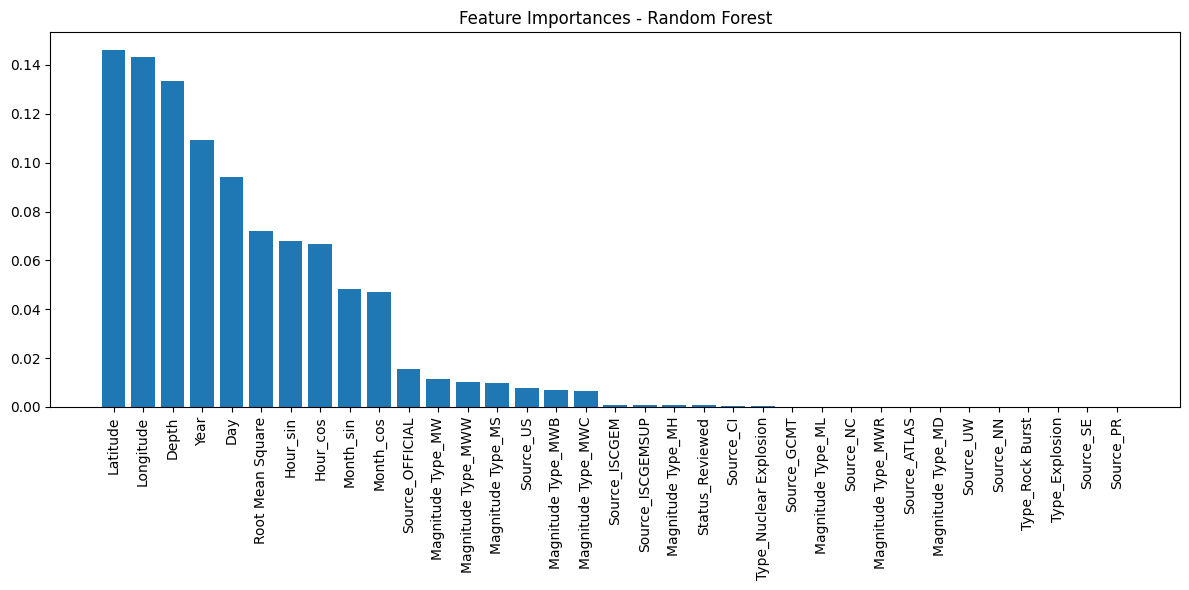

In [12]:
# Plot feature importance
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Save the trained model for future use
import joblib
joblib.dump(rf_model, 'random_forest_earthquake_model.pkl')

['random_forest_earthquake_model.pkl']